In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder as OE
from sklearn.model_selection import train_test_split as TTS
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score as AS, recall_score as rs, f1_score as f1, precision_score as ps, confusion_matrix as cfm
from imblearn.over_sampling import SMOTE
import numpy as np
import time
from sklearn.metrics import roc_curve, auc, RocCurveDisplay as RCD

In [2]:
data = pd.read_csv('predictive_maintenance.csv')
data = data.drop(columns=['UDI', 'Product ID', 'Failure Type'])
col = data['Type'].unique()
oe = OE(categories=[col])
data['Type'] = oe.fit_transform(data[['Type']])

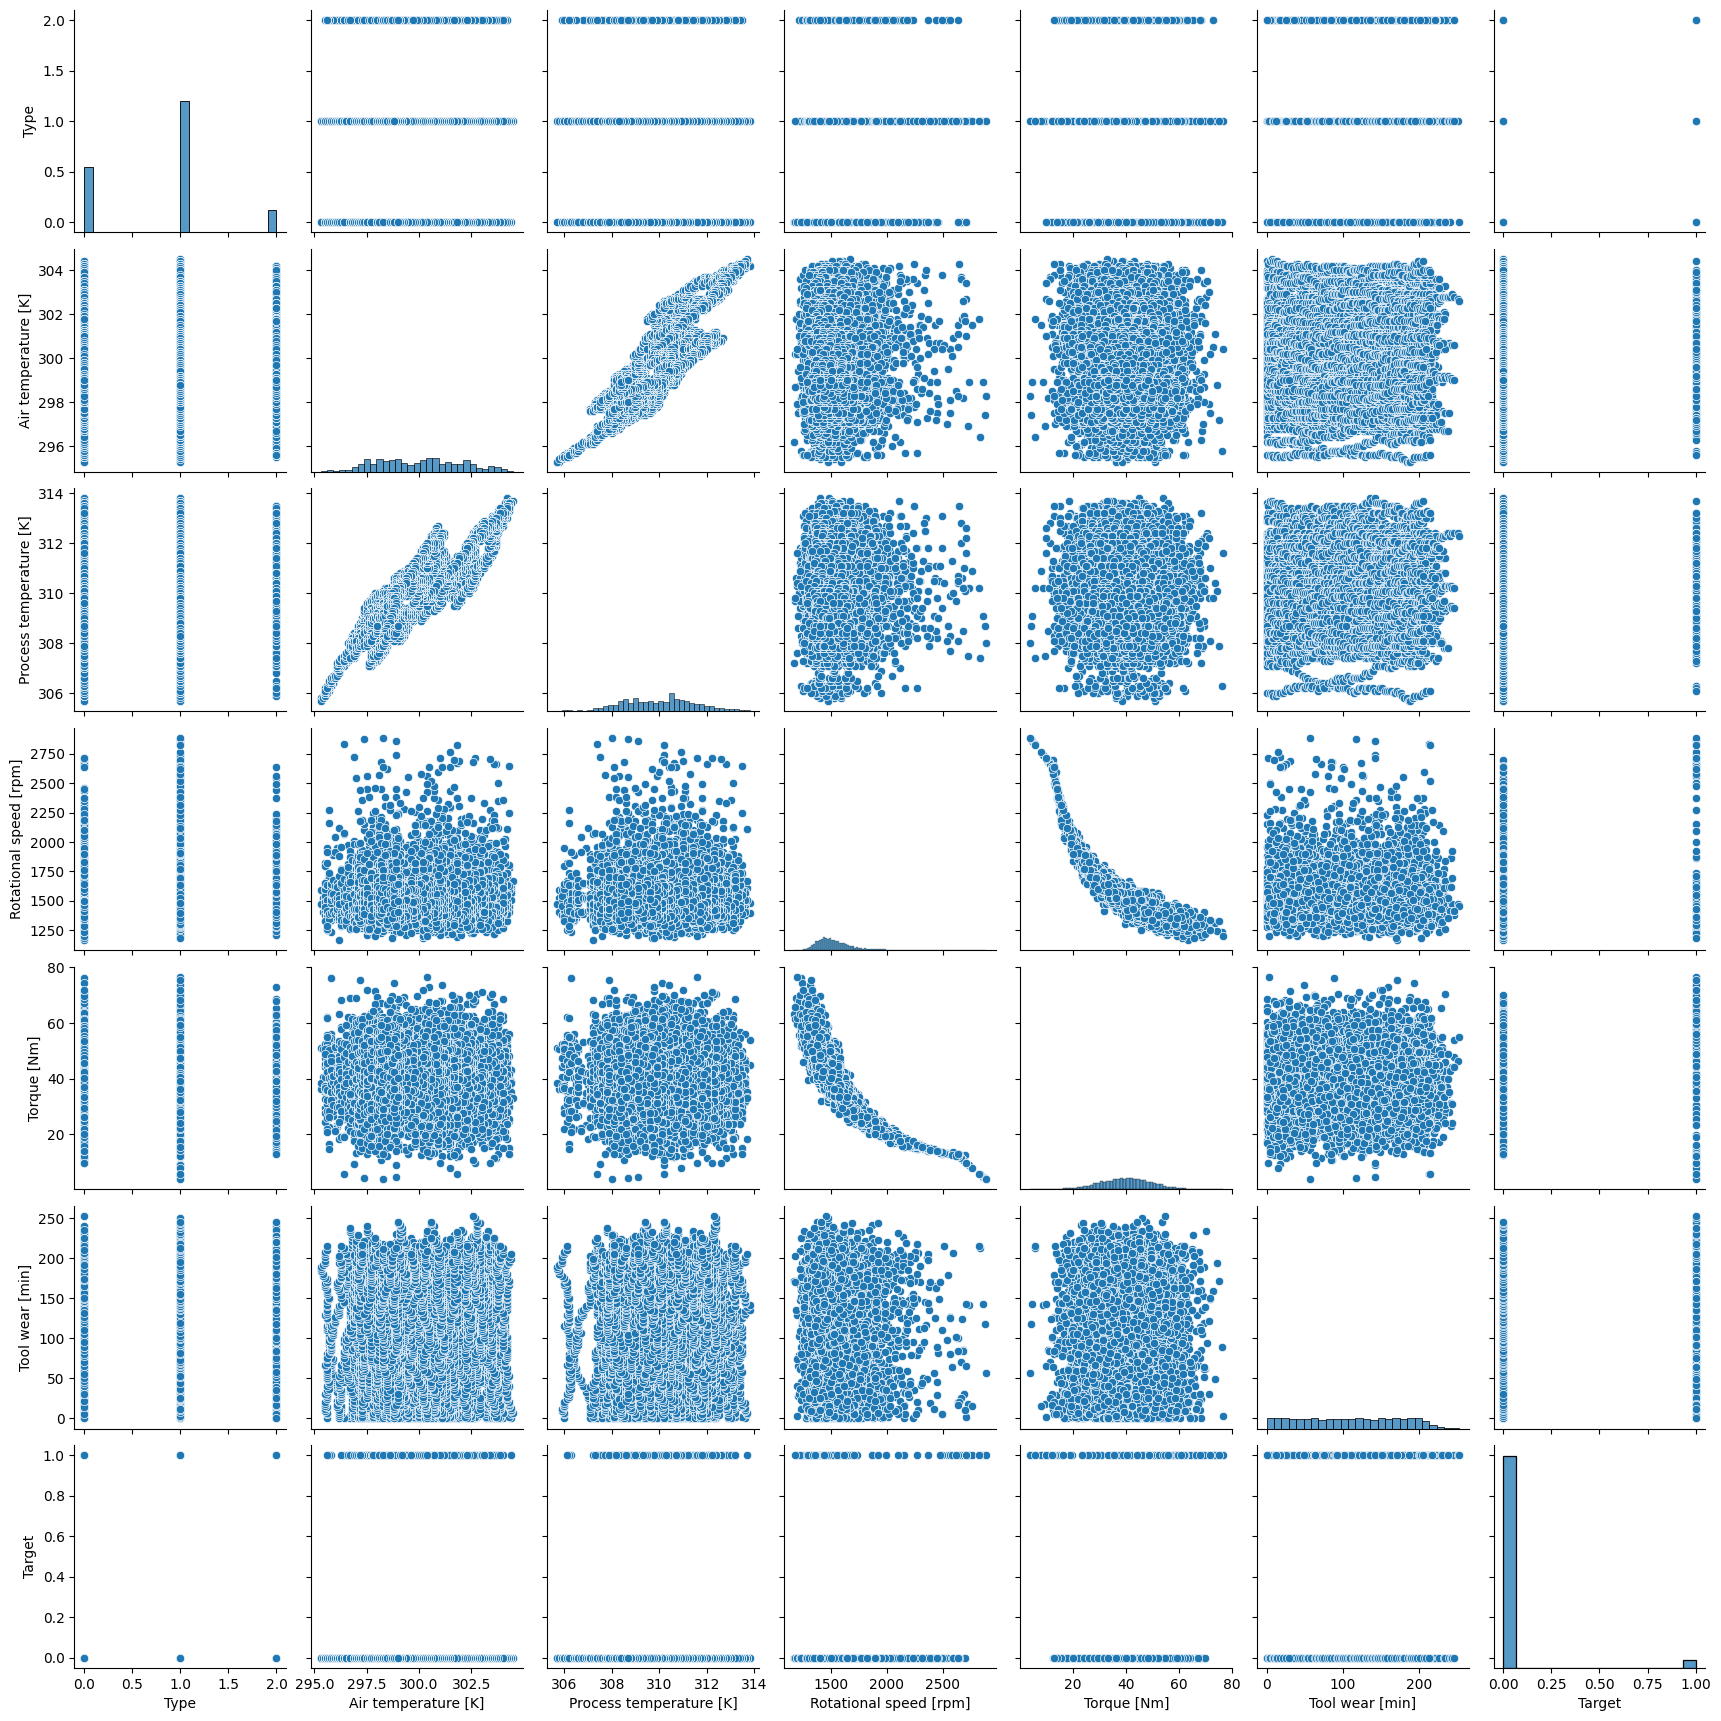

In [3]:
sns.pairplot(data=data)
plt.show()

In [4]:
x = data.iloc[:, :-1]
y = data['Target']
s = SMOTE(random_state=42)
x_res, y_res = s.fit_resample(x, y)
x_train, x_test, y_train, y_test = TTS(x_res, y_res, test_size=0.2, random_state=42)

In [5]:
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn.fit(x_train, y_train)
y_pred = nn.predict(x_test)

In [6]:
print(f"Without Noise Tolerance\nAccuracy = {AS(y_test, y_pred)*100}\nRecall = {rs(y_test, y_pred)*100}\nf1 = {f1(y_test, y_pred)*100}\nPrecision = {ps(y_test, y_pred)*100}")

Without Noise Tolerance
Accuracy = 85.5627425614489
Recall = 83.79078197824961
f1 = 85.2925672113864
Precision = 86.8491680085883


In [7]:
from sklearn.metrics import ConfusionMatrixDisplay as CMD

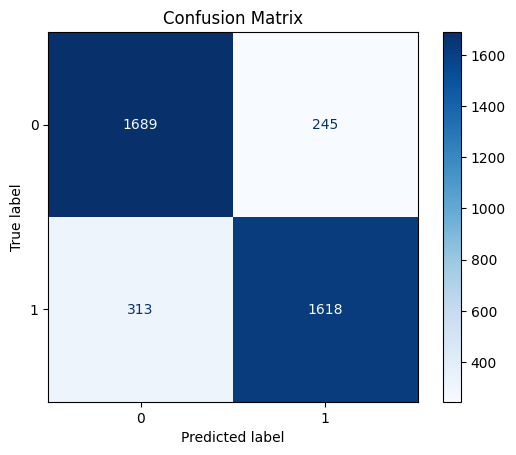

In [8]:
mat = cfm(y_test, y_pred)
disp = CMD(confusion_matrix=mat, display_labels=nn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [9]:
x_test_noisy = x_test.copy()
y_pred_noisy = nn.predict(x_test_noisy)

f1_noisy = f1(y_test, y_pred_noisy)
print(f"F1 Score on Noisy Data: {f1_noisy*100}")
f1_noisy = AS(y_test, y_pred_noisy)
print(f"Accuracy Score on Noisy Data: {f1_noisy*100}")
f1_noisy = rs(y_test, y_pred_noisy)
print(f"Recall Score on Noisy Data: {f1_noisy*100}")
f1_noisy = ps(y_test, y_pred_noisy)
print(f"Precision Score on Noisy Data: {f1_noisy*100}")

F1 Score on Noisy Data: 85.2925672113864
Accuracy Score on Noisy Data: 85.5627425614489
Recall Score on Noisy Data: 83.79078197824961
Precision Score on Noisy Data: 86.8491680085883


In [10]:
start_train = time.time()
nn.fit(x_train, y_train)
end_train = time.time()
train_time = end_train - start_train
print(f"Training time: {train_time:.4f} seconds")

start_pred = time.time()
y_pred = nn.predict(x_test)
end_pred = time.time()
pred_time = end_pred - start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

Training time: 13.6177 seconds
Prediction time: 0.0079 seconds


AUC Score: 0.9412


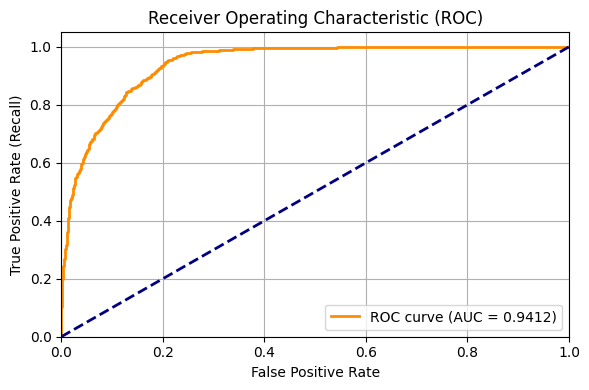

In [11]:
y_probs = nn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()